In [1]:
# 기본 import
import tensorflow 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# fashion-MNIST 데이터 import
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Keras MODEL 구축 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# Keras MODEL 시각화 import
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot 

# # 무시
# from jupyterthemes import jtplot 
# jtplot.style()

# 1. 데이터 생성

In [2]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 클래스 갯수 
nb_classes = 10

# 데이터 전처리
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# training set & validate set 
X_val = X_train[50000:]
X_train = X_train[:50000]
Y_val = Y_train[50000:]
Y_train = Y_train[:50000]

print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

MNIST data loaded: train: 50000 test: 10000
X_train: (50000, 28, 28)
y_train: (60000,)
Y_train: (50000, 10)
X_val: (10000, 28, 28)
Y_val: (10000, 10)


# 2. 모델 구축

In [3]:
multilayer_model = Sequential()

multilayer_model.add(Dense(units=10, input_dim=28*28))
multilayer_model.add(Activation('relu'))

multilayer_model.add(Dense(units=20))
multilayer_model.add(Activation('relu'))

multilayer_model.add(Dense(units=20))
multilayer_model.add(Activation('relu'))

multilayer_model.add(Dense(units=10))
multilayer_model.add(Activation('relu'))

multilayer_model.add(Dense(units=10, activation='softmax'))


multilayer_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(multilayer_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
__________

## 2-1 SVG 모듈을 활용하여 모델 구성 확인

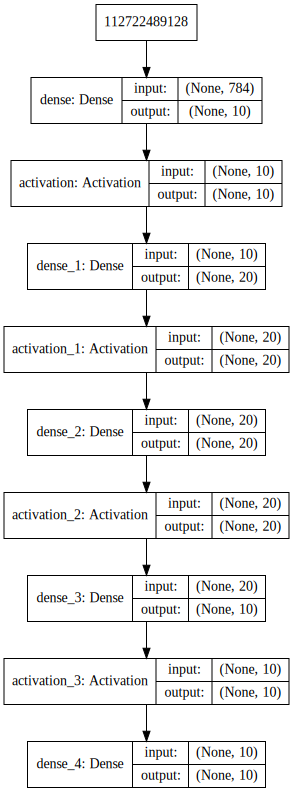

In [4]:
SVG(model_to_dot(multilayer_model, show_shapes=True).create(prog='dot', format='svg'))

# 3. 모델 학습

In [5]:
epochs = 10 

multilayer_model.fit(X_train.reshape((-1,28*28)), 
                          Y_train, 
                          epochs=epochs, 
                          batch_size=100,
                          validation_data=(X_val.reshape((-1,28*28)), Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 55us/step - loss: 0.9337 - acc: 0.6515 - val_loss: 0.5853 - val_acc: 0.7912
Epoch 2/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.5036 - acc: 0.8213 - val_loss: 0.5035 - val_acc: 0.8214
Epoch 3/10
50000/50000 [==============================] - 2s 35us/step - loss: 0.4574 - acc: 0.8376 - val_loss: 0.4535 - val_acc: 0.8400
Epoch 4/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.4336 - acc: 0.8452 - val_loss: 0.4366 - val_acc: 0.8427
Epoch 5/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.4157 - acc: 0.8511 - val_loss: 0.4349 - val_acc: 0.8461
Epoch 6/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.4058 - acc: 0.8529 - val_loss: 0.4288 - val_acc: 0.8461
Epoch 7/10
50000/50000 [==============================] - 2s 34us/step - loss: 0.3952 - acc: 0.8568 - val_loss: 0.4323 - val_acc

# 4. 모델 평가하기

In [6]:
loss_and_metrics = multilayer_model.evaluate(X_test.reshape((-1,28*28)), Y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 29us/step

loss_and_metrics : [0.43909759550094607, 0.8394]
